In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/avnyadav/sensor-fault-detection/main/aps_failure_training_set1.csv' , na_values = 'na')

In [3]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,pos,153204,0,182,na,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0
1,pos,453236,na,2926,na,0,0,0,0,222,...,7908038,3026002,5025350,2025766,1160638,533834,493800,6914,0,0
2,pos,72504,na,1594,1052,0,0,0,244,178226,...,1432098,372252,527514,358274,332818,284178,3742,0,0,0
3,pos,762958,na,na,na,na,na,776,281128,2186308,...,na,na,na,na,na,na,na,na,na,na
4,pos,695994,na,na,na,na,na,0,0,0,...,1397742,495544,361646,28610,5130,212,0,0,na,na


### Basic Data Understanding

In [4]:
df.shape

(36188, 171)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36188 entries, 0 to 36187
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 47.2+ MB


In [8]:
df['class'].value_counts()

class
neg    35188
pos     1000
Name: count, dtype: int64

In [11]:
categorical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numeric_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 170 numerical features : ['class', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000',

# Challenges and Other Objectives

## I. Key Challenges

* Need to handle **many Null values** in **almost all columns**.

---

## II. Project Objectives & Constraints

* **No low-latency requirement** ($\text{high}$ tolerance for prediction time).
* **Interpretability is not important** ($\text{low}$ priority).
* **Misclassification** leads to **unecessary repair costs** ($\text{critical}$ focus on minimizing error types that drive cost).

Plotting missing values

In [30]:
for feature in df.columns:
    percentage_missing = (df[feature].isnull().sum() / len(df)) * 100
    print(f"Percentage of missing values in {feature} is {percentage_missing:.2f}%")

Percentage of missing values in class is 0.00%
Percentage of missing values in aa_000 is 0.00%
Percentage of missing values in ab_000 is 77.09%
Percentage of missing values in ac_000 is 5.92%
Percentage of missing values in ad_000 is 25.42%
Percentage of missing values in ae_000 is 4.39%
Percentage of missing values in af_000 is 4.39%
Percentage of missing values in ag_000 is 1.05%
Percentage of missing values in ag_001 is 1.05%
Percentage of missing values in ag_002 is 1.05%
Percentage of missing values in ag_003 is 1.05%
Percentage of missing values in ag_004 is 1.05%
Percentage of missing values in ag_005 is 1.05%
Percentage of missing values in ag_006 is 1.05%
Percentage of missing values in ag_007 is 1.05%
Percentage of missing values in ag_008 is 1.05%
Percentage of missing values in ag_009 is 1.05%
Percentage of missing values in ah_000 is 1.06%
Percentage of missing values in ai_000 is 1.04%
Percentage of missing values in aj_000 is 1.04%
Percentage of missing values in ak_000 

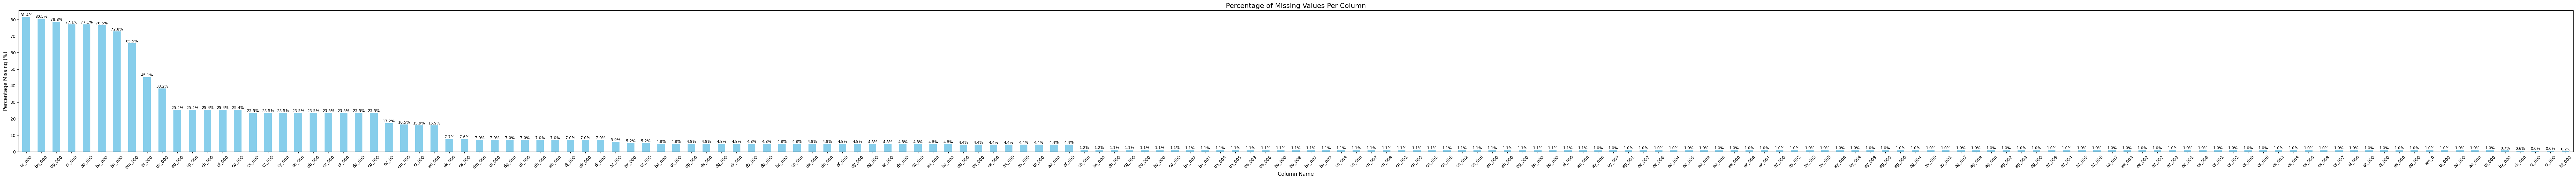

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# The calculation can be done more concisely, and the sorting step
# is placed after the calculation for clarity.

# 1. Calculate the percentage of missing values and sort
missing_percentage = (
    df.isnull().sum() / len(df) * 100
).sort_values(ascending=False)

# 2. Filter out columns with 0% missing values for a cleaner plot
# This is a common and useful improvement.
missing_percentage = missing_percentage[missing_percentage > 0]

# Check if there are any missing values to plot
if not missing_percentage.empty:
    # 3. Setup for Plotting
    # Dynamic figsize based on the number of columns to plot
    num_cols = len(missing_percentage)
    fig_width = max(10, num_cols * 0.5) # Ensure a minimum width, scale with columns

    fig, ax = plt.subplots(figsize=(fig_width, 6))

    # 4. Create Bar Plot
    # Use the index (column names) and values (percentages) directly
    missing_percentage.plot(kind='bar', ax=ax, color='skyblue')

    # 5. Add Plot Enhancements
    ax.set_title('Percentage of Missing Values Per Column', fontsize=16)
    ax.set_ylabel('Percentage Missing (%)', fontsize=12)
    ax.set_xlabel('Column Name', fontsize=12)
    ax.tick_params(axis='x', rotation=45) # Rotate X-labels for better reading

    # Optional: Add the percentage value on top of each bar
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.1f}%',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            fontsize=9
        )

    plt.tight_layout() # Adjust plot to prevent labels from being cut off
    plt.show()
else:
    print("No missing values found in the DataFrame.")

Dropping Columns which has more than 70% of missing values.

In [34]:
drop_cols = missing_percentage[missing_percentage > 70]
df.drop(list(drop_cols.index), axis=1, inplace=True)

In [35]:
# Check shape of the dataset after dropping columns
df.shape

(36188, 164)

## Checking the Uniqueness of dataset

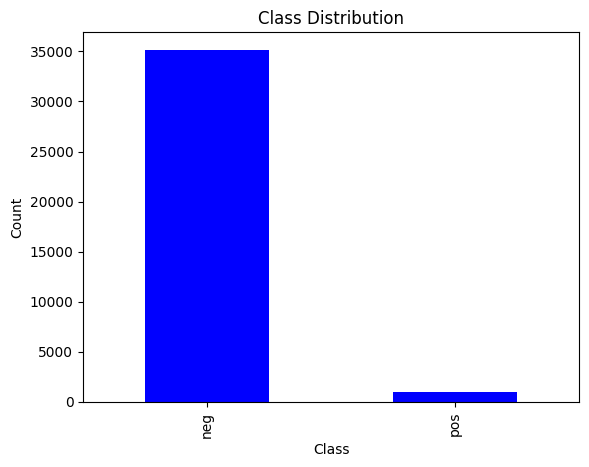

In [38]:
df['class'].value_counts().plot(kind='bar', color='blue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**Report**

* The target classes are highly imbalanced
* Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that of the positive class (minority class)
* If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model.
Hence we should handle imbalanced data with certain methods.

**How to handle Imbalance Data ?**

Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.